In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def fx(x):
    return 3 * x**2 - 3 * x + 4


def deriv(x):
    return 6 * x - 3

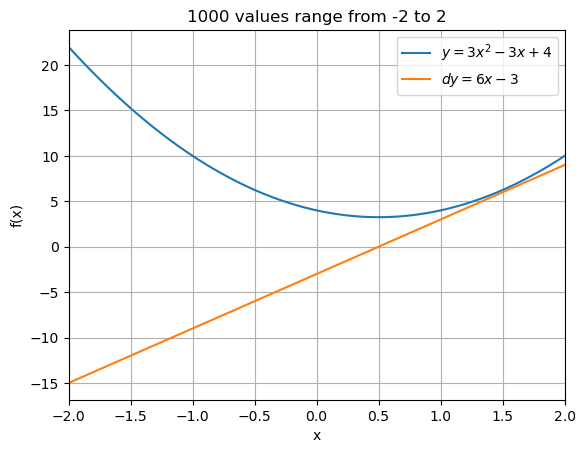

In [51]:
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, deriv(x))

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["$y=3x^2 - 3x + 4$", "$dy=6x - 3$"])
plt.title("1000 values range from -2 to 2")

plt.show()

## 1D Gradient Descent

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent.

### Mathematical Formulation

Given a function $f(x)$, the gradient descent update rule is:

$$x_{n+1} = x_n - \alpha \cdot \nabla f(x_n)$$

Where:

- $x_n$ is the current point at iteration $n$
- $\alpha$ is the learning rate (step size)
- $\nabla f(x_n)$ is the gradient (derivative) of $f$ at $x_n$

### For a 1D Function

For a univariate function $f(x)$, the update rule becomes:

$$x_{n+1} = x_n - \alpha \cdot \frac{df}{dx}\bigg|_{x=x_n}$$

### Convergence Condition

The algorithm converges when the gradient approaches zero:

$$\left|\frac{df}{dx}\right| \approx 0$$

This indicates we've found a critical point (local minimum or maximum).

### Algorithm Steps

1. Initialize $x_0$ randomly
2. For each epoch $i = 1, 2, \ldots, N$:
   - Compute the gradient: $g_i = \frac{df}{dx}|_{x=x_{i-1}}$
   - Update the parameter: $x_i = x_{i-1} - \alpha \cdot g_i$
3. Return the final value $x_N$


In [52]:
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate = 0.01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate * grad

localmin

array([0.49676974])

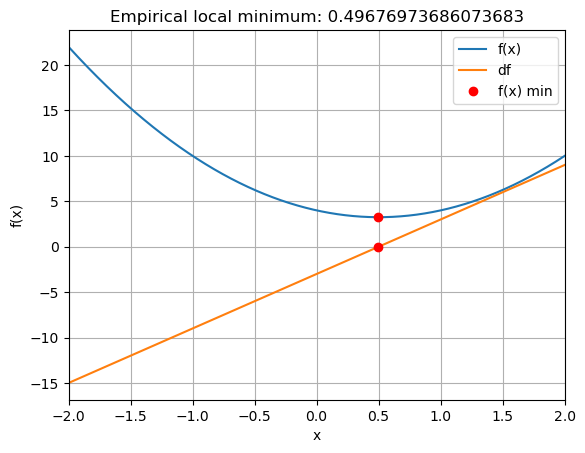

In [53]:
# plot the results

plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), "ro")
plt.plot(localmin, fx(localmin), "ro")


plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)", "df", "f(x) min"])
plt.title("Empirical local minimum: %s" % localmin[0])
plt.show()

### Store the value of Local min at every epoch.


In [54]:
localmin = np.random.choice(x, 1)[0]

# learning parameters
learning_rate = 0.01
training_epochs = 100

modelparams = np.zeros((training_epochs, 2))

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate * grad
    modelparams[i, :] = localmin, grad

localmin

0.49596833570023274

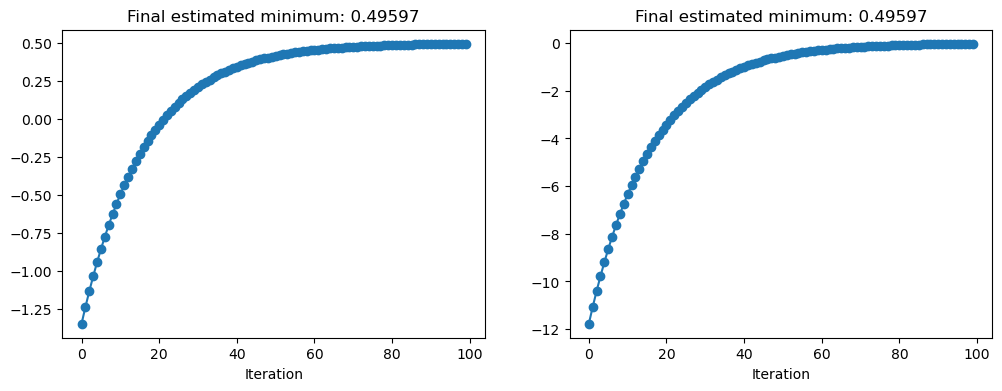

In [55]:
fix, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], "o-")
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(f"Final estimated minimum: {localmin:.5f}")

ax[0].set_label("local minimum")
ax[1].set_label("Derivative")

plt.show()